# Dave - Modèles d'apprentissage de machine

In [2]:
import cupy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

## I - Chargement, partionnement et normalisation des données

In [3]:
data = pd.read_csv("cleaned_data.csv")
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
labels = ["C201", "C203", "C204", "C205", "C206", "C207", "C208", "C210", "DC", "MC"]

On sépare les données en deux lots principaux : le lot d'entraînement et le lot de test. Le lot d'entraînement est lui-même sous-divisé en deux pour avoir un lot de validation afin de mieux évaluer le sur ou sous-apprentissage dans le cas des réseaux de neurones profonds.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

On normalise toutes nos données.

In [23]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import pickle 

with open("scaler.sav", "wb") as file:
    pickle.dump(scaler, file)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

## II - Modèle KNN

#### A) Entrainement

In [25]:
neigh = KNeighborsClassifier(n_neighbors=3)
st = time.time()
neigh.fit(X_train.get(), y_train.get())
et = time.time()
elapsed = et - st
print("Exec time: %f seconds" % elapsed)

Exec time: 0.010938 seconds


#### B) Phase de test

In [26]:
knn_results = neigh.predict(X_test.get())

#### C) Résultats

Test acc is 100.00%


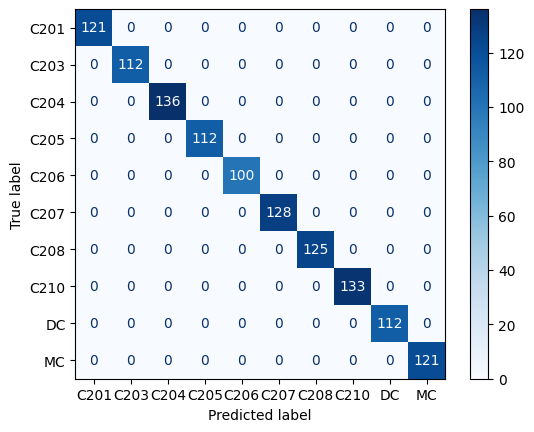

In [27]:
knn_test_acc = ((y_test.get() == knn_results).sum() / len(y_test)) * 100
print("Test acc is %.2f%%" % knn_test_acc)
disp = ConfusionMatrixDisplay.from_estimator(neigh, X_test.get(), y_test.get(), display_labels=labels, cmap=plt.cm.Blues)
plt.show()

In [38]:
def test_KNN(neighbors=200):
    neigh = KNeighborsClassifier(n_neighbors=neighbors*2 + 1)
    st = time.time()
    neigh.fit(X_train.get(), y_train.get())
    et = time.time()
    elapsed = et - st
    knn_results = neigh.predict(X_test.get())
    knn_test_acc = ((y_test.get() == knn_results).sum() / len(y_test)) * 100
    
    return knn_test_acc

In [41]:
min_n = 0
max_n = 2000

acc = []

for i in range(min_n, max_n):
    acc.append([i*2+1, test_KNN(i)])

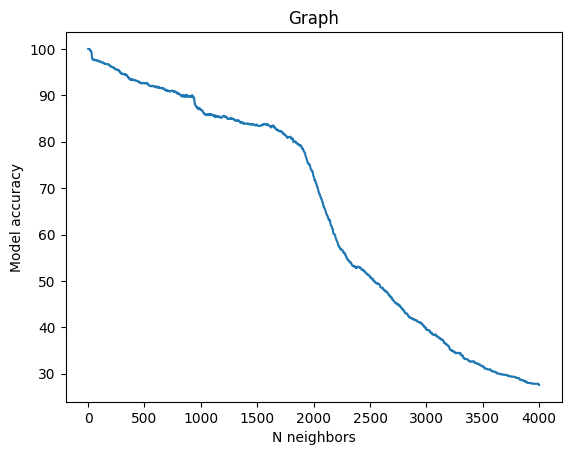

In [42]:
import matplotlib.pyplot as plt


# Extract x and y values from the data
x = [point[0] for point in acc]
y = [point[1] for point in acc]

# Plot the graph
plt.plot(x, y)
plt.xlabel('N neighbors')
plt.ylabel('Model accuracy')
plt.title('Graph')
plt.show()

## III - Modèle de régression logistique

#### A) Entrainement 

In [29]:
clf = LogisticRegression(solver="newton-cg", random_state=3, max_iter=10000)
st = time.time()
clf.fit(X_train.get(), y_train.get())
et = time.time()
elapsed = et - st
print("Exec time: %f seconds" % elapsed)

Exec time: 0.217812 seconds


#### B) Phase de test

In [30]:
lr_results = clf.predict(X_test.get())

 #### C) Résultats

Test acc is 99.58%


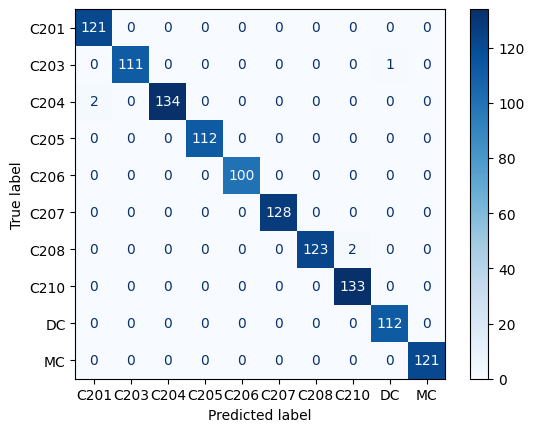

In [31]:
lr_test_acc = ((y_test.get() == lr_results).sum() / len(y_test)) * 100
print("Test acc is %.2f%%" % lr_test_acc)
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test.get(), y_test.get(), display_labels=labels, cmap=plt.cm.Blues)
plt.show()

In [11]:
import pickle

with open('model.sav', 'wb') as file:
    pickle.dump(clf, file)

## IV- Modèle de Perceptron multicouche

#### A) Entrainement 

In [32]:
clf = MLPClassifier(solver="lbfgs", random_state=3, max_iter=10000)
st = time.time()
clf.fit(X_train.get(), y_train.get())
et = time.time()
elapsed = et - st
print("Exec time: %f seconds" % elapsed)

Exec time: 0.782699 seconds


#### B) Phase de test

In [33]:
lr_results = clf.predict(X_test.get())

 #### C) Résultats

Test acc is 99.75%


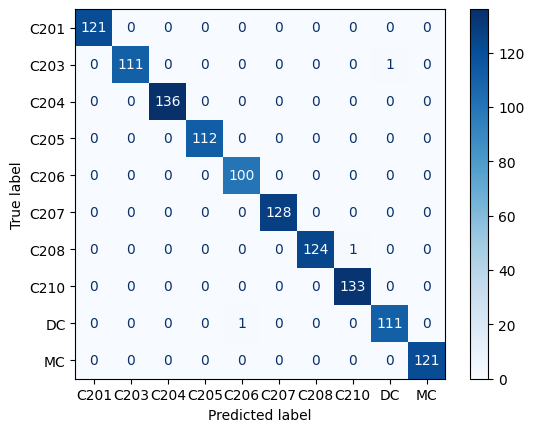

In [34]:
lr_test_acc = ((y_test.get() == lr_results).sum() / len(y_test)) * 100
print("Test acc is %.2f%%" % lr_test_acc)
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test.get(), y_test.get(), display_labels=labels, cmap=plt.cm.Blues)
plt.show()